MAP for top 10.0%: 0.9346642468239564, Total Matches: 2060
MAP for top 20.0%: 0.9750453720508166, Total Matches: 2149
MAP for top 30.0%: 0.9877495462794919, Total Matches: 2177
MAP for top 40.0%: 0.9950090744101633, Total Matches: 2193
MAP for top 50.0%: 0.9968239564428312, Total Matches: 2197
MAP for top 60.0%: 0.9972776769509982, Total Matches: 2198
MAP for top 70.0%: 0.9972776769509982, Total Matches: 2198
MAP for top 80.0%: 0.9981851179673321, Total Matches: 2200
MAP for top 90.0%: 0.9986388384754991, Total Matches: 2201
MAP for top 100.0%: 1.0, Total Matches: 2204


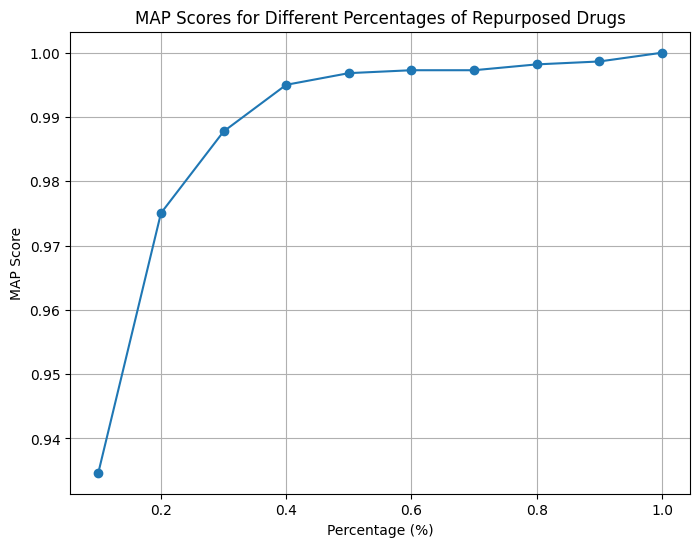

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load combined TARGETID-DRUGID and validation set data from CSV file
combined_data_file ='C:/Users/sides/Downloads/DRUG_ID_TARGET.csv'

# Read combined data from CSV file
combined_data = pd.read_csv(combined_data_file)

# Group the data by 'TARGETID' and aggregate DRUGID into a list for each TARGETID
grouped_data = combined_data.groupby('TARGETID')['DRUGID'].agg(list).reset_index()

# Create a dictionary mapping TARGETIDs to corresponding DRUGID
TARGETID_DRUGID_mapping = dict(zip(grouped_data['TARGETID'], grouped_data['DRUGID']))

# Create a dictionary mapping TARGETIDs to relevant DRUGID from the validation set
validation_set = dict(zip(combined_data['TARGETID'], combined_data['DRUGID'].str.split(',')))

# Function to calculate precision at k
def precision_at_k(relevant_items, recommended_items, k):
    intersection = set(recommended_items[:k]) & set(relevant_items)
    return len(intersection) / min(k, len(relevant_items)), len(intersection)  # Return count of matches as well

# Function to calculate average precision
def average_precision(relevant_items, recommended_items):
    precisions = [
        precision_at_k(relevant_items, recommended_items, k + 1)
        for k in range(len(recommended_items))
        if recommended_items[k] in relevant_items
    ]
    if not precisions:
        return 0.0, 0  # Return 0 matches if no precisions calculated
    avg_precision = sum(p[0] for p in precisions) / len(relevant_items)
    total_matches = sum(p[1] for p in precisions)
    return avg_precision, total_matches

# Calculate Mean Average Precision (MAP) and count of matches for different percentages of potential repurposed DRUGID
percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Percentage values for top repurposed DRUGID
TARGETID_count = 10000  # Assuming you reduced TARGETIDs to the top 2000 most frequent TARGETIDs

# Lists to store MAP scores and total match counts for each percentage
map_scores = []
match_counts = []

for percentage in percentages:
    top_percent = int(max(len(DRUGID) for DRUGID in TARGETID_DRUGID_mapping.values()) * percentage)
    map_scores_for_percentage = []
    match_counts_for_percentage = []
    for TARGETID, DRUGID in list(TARGETID_DRUGID_mapping.items())[:TARGETID_count]:
        recommended_items = DRUGID[:top_percent]
        relevant_items = validation_set.get(TARGETID, [])
        avg_precision, total_matches = average_precision(relevant_items, recommended_items)
        map_scores_for_percentage.append(avg_precision)
        match_counts_for_percentage.append(total_matches)
    mean_map_score = sum(map_scores_for_percentage) / len(map_scores_for_percentage)
    total_match_count = sum(match_counts_for_percentage)
    map_scores.append(mean_map_score)
    match_counts.append(total_match_count)
    print(f"MAP for top {percentage * 100}%: {mean_map_score}, Total Matches: {total_match_count}")

# Convert lists to numpy arrays if they aren't already
percentages = np.array(percentages)
map_scores = np.array(map_scores)


# Plotting the MAP scores against percentages
plt.figure(figsize=(8, 6))
plt.plot(percentages, map_scores, marker='o')
plt.title('MAP Scores for Different Percentages of Repurposed Drugs')
plt.xlabel('Percentage (%)')
plt.ylabel('MAP Score')
plt.grid(True)
plt.show()

In [2]:
# Simulated function to calculate similarity score between drugs and diseases
def calculate_similarity(drugs, diseases):
    similarity_matrix = np.random.rand(len(drugs), len(diseases))  # Replace this with your actual similarity calculation logic
    return similarity_matrix

# Sample data
drugs = combined_data['DRUGID'].unique()  # Get unique drugs
diseases = combined_data['TARGETID'].unique()  # Get unique diseases

# Calculate similarity matrix between drugs and diseases
similarity_matrix = calculate_similarity(drugs, diseases)

# Example output
print(similarity_matrix)

[[0.57352909 0.01992556 0.0020318  ... 0.01263336 0.88768386 0.91773016]
 [0.47500383 0.76093056 0.80587523 ... 0.14563178 0.01734263 0.75682105]
 [0.00099876 0.50162819 0.43078938 ... 0.14213158 0.84134707 0.30782169]
 ...
 [0.12129773 0.97622752 0.0784407  ... 0.36620416 0.32283485 0.76486025]
 [0.94514694 0.02167527 0.24278274 ... 0.55675105 0.62461801 0.90055097]
 [0.85569831 0.30890225 0.84162035 ... 0.50686599 0.55003319 0.70660243]]


In [ ]:
import seaborn as sns
# Visualization 2: Heatmap for Drug-Disease Relationship based on RDS values
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Drug Repurposing: Drug-Disease Relationship (RDS values)')
plt.xlabel('Disease Index')
plt.ylabel('Drug Index')
plt.show()

# Additional analysis and visualization steps can be added as needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load drug-target association data from CSV
csv_file_path = 'C:/Users/sides/Downloads/DRUG_ID_TARGET.csv'
drug_target_df = pd.read_csv(csv_file_path)

# Assuming 'DRUGNAME' column contains the drug names or identifiers as strings
corpus = drug_target_df['DRUGNAME'].tolist()

# Tokenize drug names into sets of words
tokenized_corpus = [set(drug.split()) for drug in corpus]

# Calculate Jaccard index for drug similarity
jaccard_similarity_matrix = []
for i in range(len(tokenized_corpus)):
    jaccard_row = []
    set1 = tokenized_corpus[i]
    for j in range(len(tokenized_corpus)):
        set2 = tokenized_corpus[j]
        # Calculate Jaccard index
        jaccard = len(set1.intersection(set2)) / len(set1.union(set2)) if len(set1.union(set2)) > 0 else 0
        jaccard_row.append(jaccard)
    jaccard_similarity_matrix.append(jaccard_row)

# Convert list of lists to a numpy array for visualization
jaccard_similarity_matrix = np.array(jaccard_similarity_matrix)

# Define the range for drug indices (4000 to 6000)
start_index = 4420
end_index = 5480

# Subset the similarity matrix for the specified range
subset_similarity_matrix = jaccard_similarity_matrix[start_index:end_index, start_index:end_index]

# Plot the Jaccard similarity matrix as a heatmap for the specified range
plt.figure(figsize=(8, 6))
sns.heatmap(subset_similarity_matrix, cmap='viridis', annot=False)
plt.title('Drug Jaccard Similarity Matrix (Index Range: 4000-6000)')
plt.xlabel('Drug Index')
plt.ylabel('Drug Index')

In [ ]:
# Define a threshold for similarity
threshold = .5  # Adjust the threshold value as needed

# Find matching drugs based on the threshold in the subset similarity matrix
matching_drugs = []
c=0
for i in range(len(subset_similarity_matrix)):
    for j in range(len(subset_similarity_matrix)):
        if subset_similarity_matrix[i, j] > threshold and i != j:
            matching_drugs.append((i + start_index, j + start_index))  # Adjust indices for the original drug index
            c+=1

# Display matching drugs
print(f"Matching Drugs above the threshold of {threshold}:")
for drug_pair in matching_drugs:
    print(f"Drug Index {drug_pair[0]} and Drug Index {drug_pair[1]}")

In [ ]:
print(c)

In [ ]:
print(len(jaccard_similarity_matrix))